**Generative Adversiral Network (GAN)**

Import necesary libraries

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import os
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Conv2DTranspose,LeakyReLU, Flatten, Dense,Reshape,Dropout
from tensorflow.keras import models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from sklearn.metrics import accuracy_score, classification_report

# **Defining the Generator Architecture**

Here i have used the two conv layer to pick spacial data from the image, due to limited computaion resource i have kept the architecture shallow.

In [2]:
# Defining the generator
generator = models.Sequential()
generator.add(Dense(7 * 7 * 256, use_bias=False, input_shape=(100,)))
generator.add(BatchNormalization())
generator.add(LeakyReLU())

generator.add(Reshape((7, 7, 256)))

generator.add(Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
generator.add(BatchNormalization())
generator.add(LeakyReLU())

generator.add(Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
generator.add(BatchNormalization())
generator.add(LeakyReLU())

generator.add(Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))


# **Defining the Discriminator Architecture**

Here i have used the 2 conv layer and 1 dense layer  in discriminator to keep the architecture shallow.

In [3]:
discriminator = models.Sequential()
discriminator.add(Conv2D(64, (5, 5), strides=(2, 2), padding='same', input_shape=[28, 28, 1]))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))

discriminator.add(Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
discriminator.add(LeakyReLU())
discriminator.add(Dropout(0.3))

discriminator.add(Flatten())
discriminator.add(Dense(1))

# Preparing data
Reading the Digits dataset and pre-processing the images.
The dataset contains around 60000 train images and 10000 test images

In [4]:
# Load MNIST data
(train_images, _), (test_images, _) = mnist.load_data()

# Normalize and reshape the images
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
# Normalize to [-1, 1], this is standard normalization in Tenserflow documentation
train_images_full = (train_images - 127.5) / 127.5
test_images_full = (test_images - 127.5) / 127.5

# Select 10% of the data directly
subset_size = int(len(train_images_full) * 0.5)
train_images = train_images_full[:subset_size]
# Reshape the images to add a channel dimension for convolutional layers
train_images = np.expand_dims(train_images, axis=-1)

11490434/11490434 [==============================] - 1s 0us/step


# Define the loss

In [5]:
#Defining loss calculation function of discriminator and generator
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)
# Define the optimizers and loss function
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

# Generate and save image

In [17]:
# Generate and display images
def GenerateImage(model, epoch, test_input, stage):
    predictions = model(test_input, training=False)
    if(stage == "training"):
      if not os.path.exists("Generated Image During Training"):
        os.makedirs("Generated Image During Training")
      fig = plt.figure(figsize=(4, 4))

      for i in range(predictions.shape[0]):
          plt.subplot(4, 4, i+1)
          plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
          plt.axis('off')

      plt.savefig('Generated Image During Training/image_at_epoch_{:04d}.png'.format(epoch))
      plt.show()

    else:
      if not os.path.exists("Generated Image from final model"):
        os.makedirs("Generated Image from final model")
      num_images = min(predictions.shape[0], 16)  # Limit to 16 images if there are more
      fig, axes = plt.subplots(4, 4, figsize=(5, 5))

      for i in range(num_images):
          row = i // 4
          col = i % 4
          ax = axes[row, col]
          ax.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
          ax.axis('off')
          ax.set_title(f'Sample {i+1}')

      plt.tight_layout()
      # for i in range(predictions.shape[0]):
      #   plt.subplot(4, 4, i+1)
      #   plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      #   plt.axis('off')
      #   plt.savefig(f'Generated Image from final model/image_at_epoch_{epoch}_sample_{i}.png')  # Save each image separately
      #   plt.show()


Image after epoch: 0



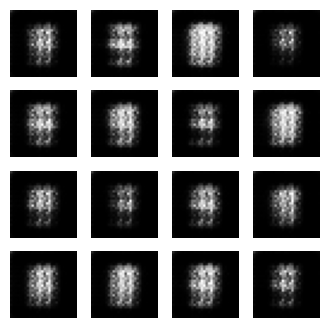


-----------------------------------------------------------------

Image after epoch: 10



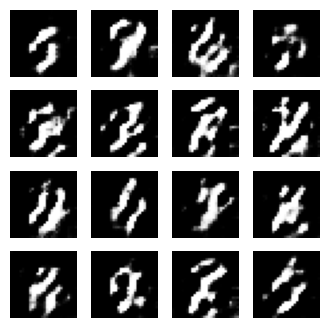


-----------------------------------------------------------------

Image after epoch: 20



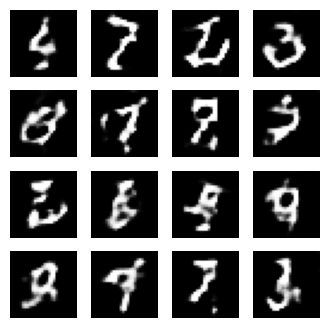


-----------------------------------------------------------------

Image after epoch: 30



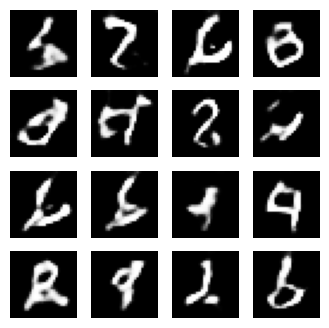


-----------------------------------------------------------------

Image after epoch: 40



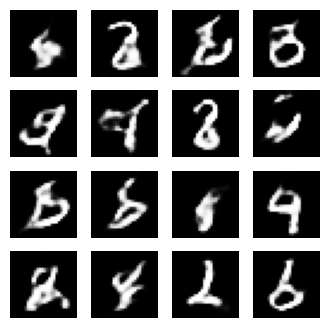


-----------------------------------------------------------------

Image after epoch: 50



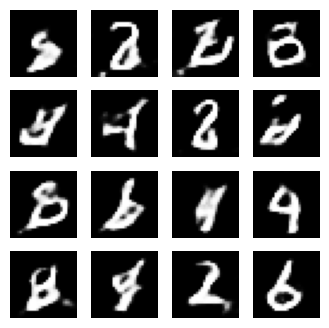


-----------------------------------------------------------------

Image after epoch: 60



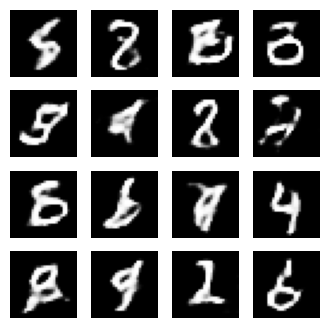


-----------------------------------------------------------------

Image after epoch: 70



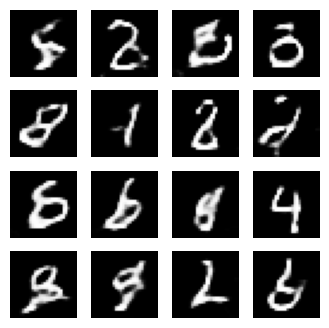


-----------------------------------------------------------------

Image after epoch: 80



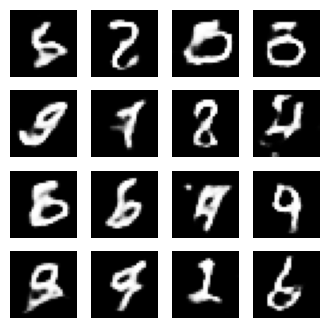


-----------------------------------------------------------------

Image after epoch: 90



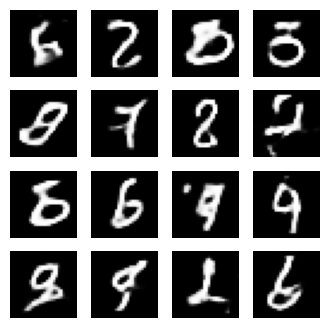


-----------------------------------------------------------------

Image after epoch: 100



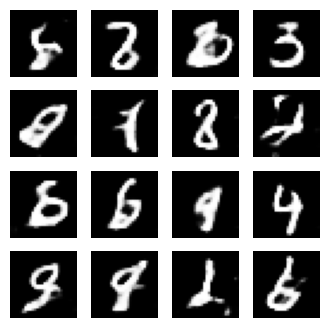


-----------------------------------------------------------------

Image after epoch: 110



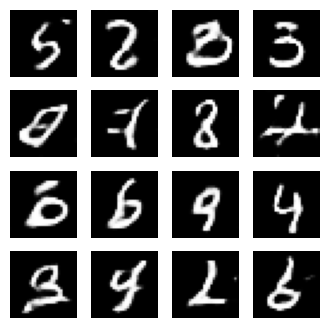


-----------------------------------------------------------------

Image after epoch: 120



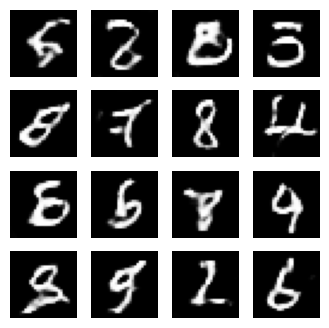


-----------------------------------------------------------------

Image after epoch: 130



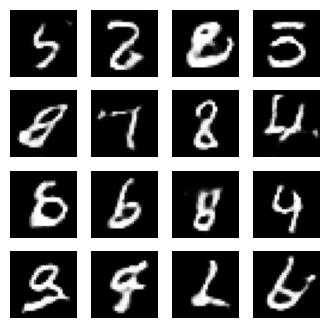


-----------------------------------------------------------------

Image after epoch: 140



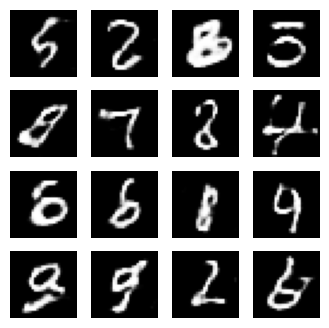


-----------------------------------------------------------------

Image after epoch: 150



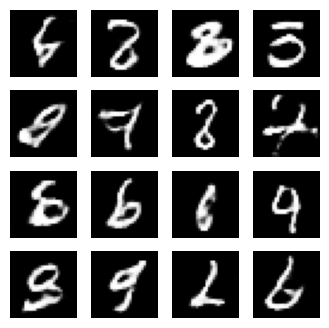


-----------------------------------------------------------------

Image after epoch: 160



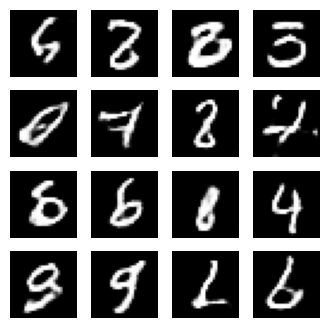


-----------------------------------------------------------------

Image after epoch: 170



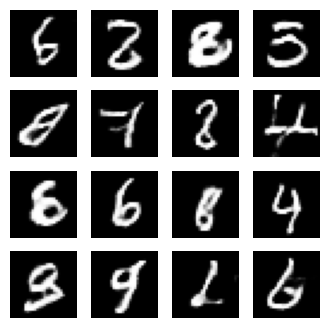


-----------------------------------------------------------------

Image after epoch: 180



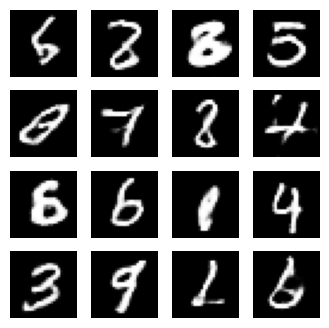


-----------------------------------------------------------------

Image after epoch: 190



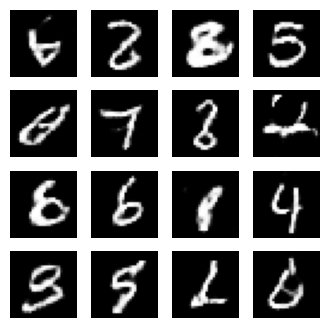


-----------------------------------------------------------------

Image after epoch: 200



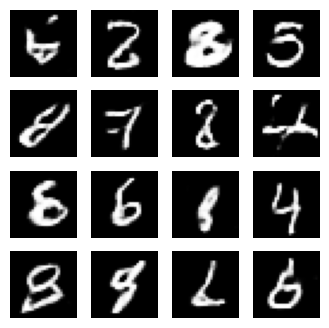


-----------------------------------------------------------------

Image after epoch: 210



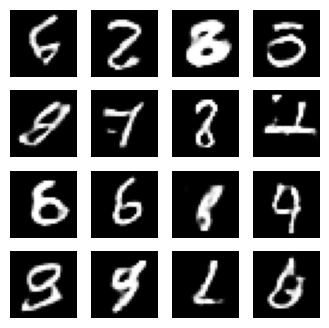


-----------------------------------------------------------------

Image after epoch: 220



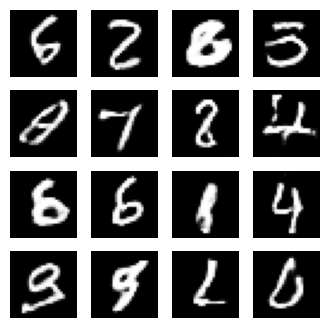


-----------------------------------------------------------------

Image after epoch: 230



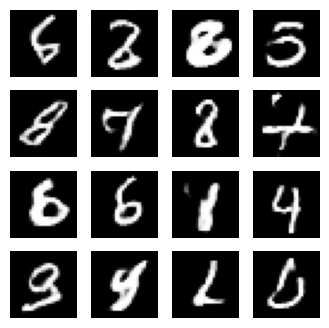


-----------------------------------------------------------------

Image after epoch: 240



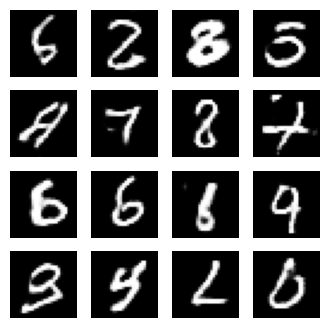


-----------------------------------------------------------------

Image after epoch: 250



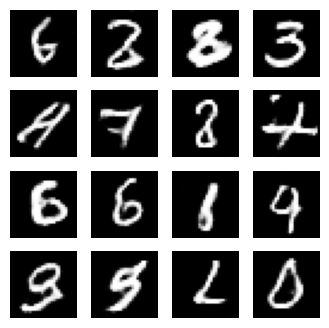


-----------------------------------------------------------------

Image after epoch: 260



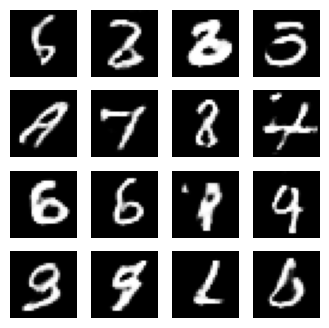


-----------------------------------------------------------------

Image after epoch: 270



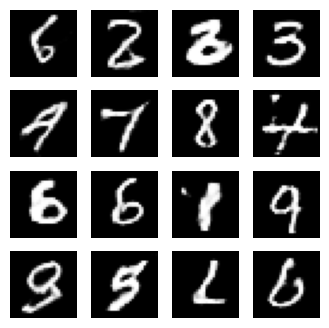


-----------------------------------------------------------------

Image after epoch: 280



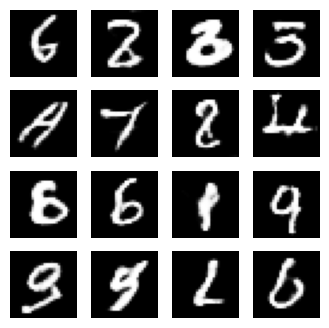


-----------------------------------------------------------------

Image after epoch: 290



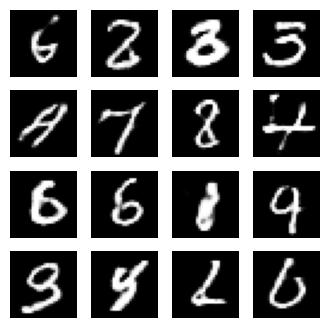


-----------------------------------------------------------------

Image after epoch: 300



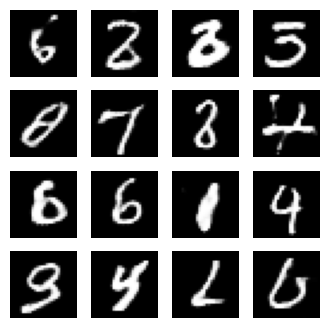


-----------------------------------------------------------------

Image after epoch: 310



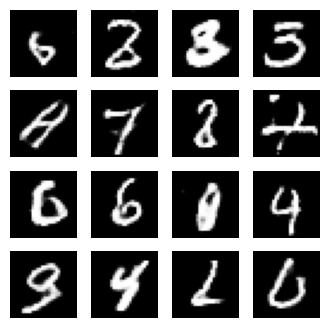


-----------------------------------------------------------------

Image after epoch: 320



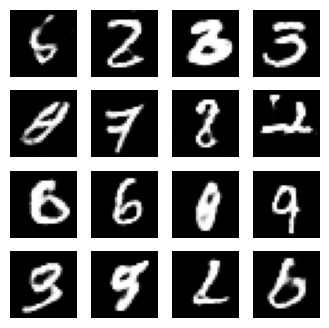


-----------------------------------------------------------------

Image after epoch: 330



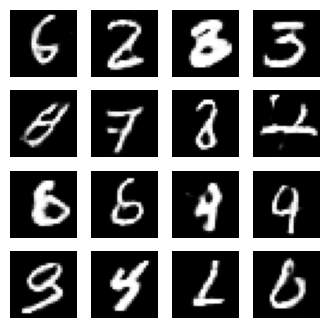


-----------------------------------------------------------------

Image after epoch: 340



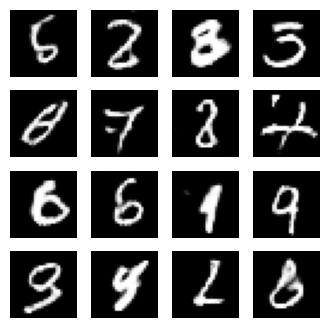


-----------------------------------------------------------------

Image after epoch: 350



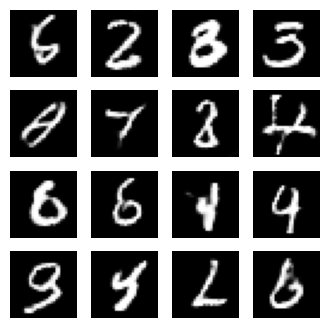


-----------------------------------------------------------------

Image after epoch: 360



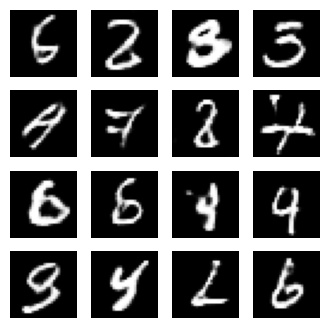


-----------------------------------------------------------------

Image after epoch: 370



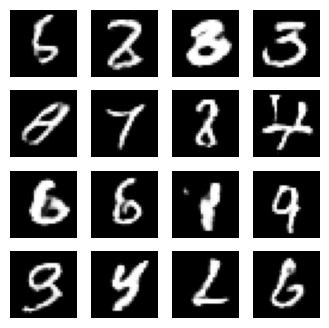


-----------------------------------------------------------------

Image after epoch: 380



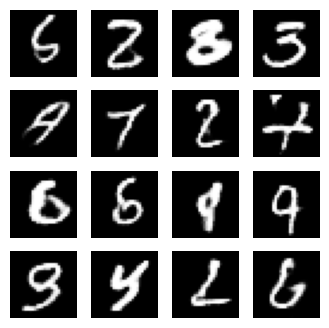


-----------------------------------------------------------------

Image after epoch: 390



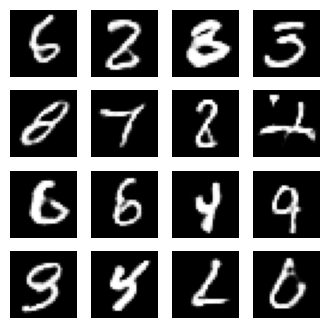


-----------------------------------------------------------------

Image after epoch: 400



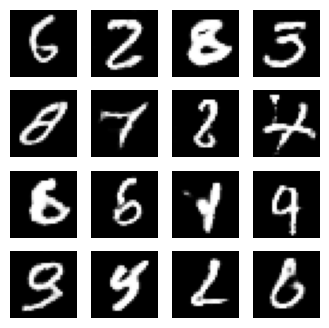


-----------------------------------------------------------------

Image after epoch: 410



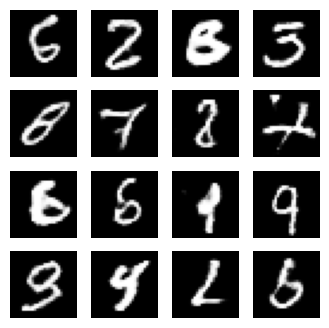


-----------------------------------------------------------------

Image after epoch: 420



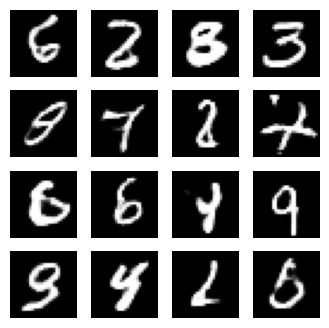


-----------------------------------------------------------------

Image after epoch: 430



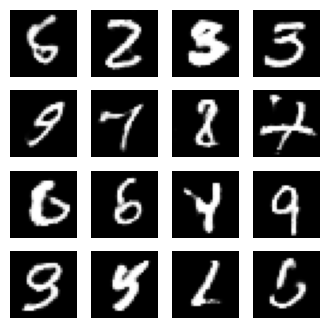


-----------------------------------------------------------------

Image after epoch: 440



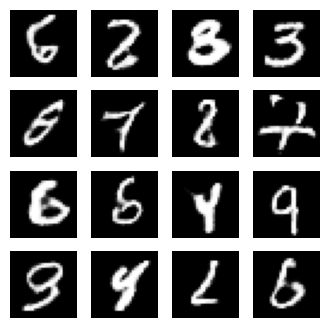


-----------------------------------------------------------------

Image after epoch: 450



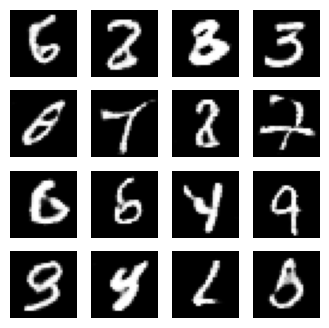


-----------------------------------------------------------------

Image after epoch: 460



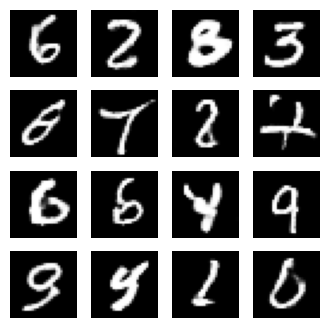


-----------------------------------------------------------------

Image after epoch: 470



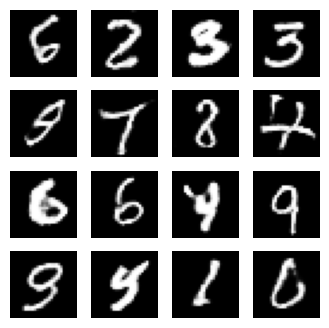


-----------------------------------------------------------------

Image after epoch: 480



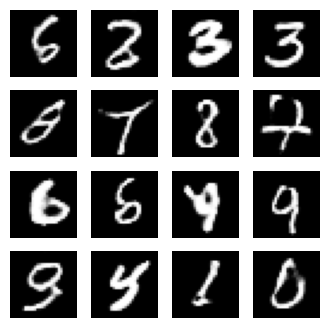


-----------------------------------------------------------------

Image after epoch: 490



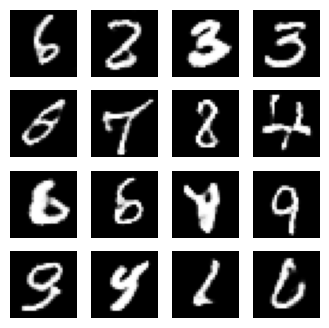


-----------------------------------------------------------------



In [7]:
# Define the training function
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, 100])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        generated_images = generator(noise, training=True)

        real_output = discriminator(images, training=True)
        fake_output = discriminator(generated_images, training=True)

        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

# Training loop
EPOCHS = 500
BATCH_SIZE = 100
BUFFER_SIZE = train_images.shape[0]
# Define the seed for generating consistent images
seed = tf.random.normal([16, 100])  # 16 images with 100-dimensional noise


train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

for epoch in range(EPOCHS):
    for image_batch in train_dataset:
        train_step(image_batch)

    if epoch % 10 == 0:
        #display.clear_output(wait=True)
        print("Image after epoch: "+str(epoch)+"\n")
        GenerateImage(generator, epoch + 1, seed,"training")
        print("\n-----------------------------------------------------------------\n")


### Finally Generated images after training

Image after Training


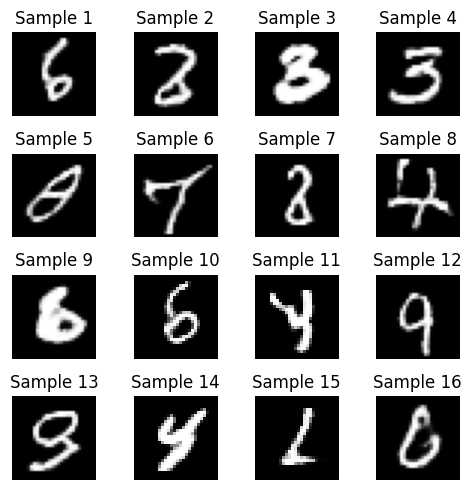

In [19]:
print("Image after Training")
GenerateImage(generator, epoch + 1, seed,"testing")